# Creating Satellite Object

Processing *wide* Image with Dimensions: (598, 1092)
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1            10.241021           59.569467
2            10.386577           59.438368
3            10.595467           59.668931
4

/Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/georeference/reference.py:816: RuntimeWarning: divide by zero encountered in divide
  65535.0*raster_data / raster_data.max())   # write band to the raster
/Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/georeference/reference.py:816: RuntimeWarning: invalid value encountered in divide
  65535.0*raster_data / raster_data.max())   # write band to the raster


      Done with band 2
      Done with band 22
      Done with band 92
      Done with band 38
      Done with band 115
      Done with band 62
      Done with band 31
      Done with band 110
      Done with band 6
      Done with band 94
      Done with band 14
      Done with band 3
      Done with band 34
      Done with band 37
      Done with band 28
      Done with band 1
      Done with band 36
      Done with band 98
      Done with band 15
      Done with band 44
      Done with band 77
      Done with band 47
      Done with band 108
      Done with band 79
      Done with band 99
      Done with band 112
      Done with band 39
      Done with band 21
      Done with band 4
      Done with band 42
      Done with band 29
      Done with band 66
      Done with band 8
      Done with band 55
      Done with band 102
      Done with band 113
      Done with band 88
      Done with band 46
      Done with band 118
      Done with band 87
      Done with band 49
      Done with

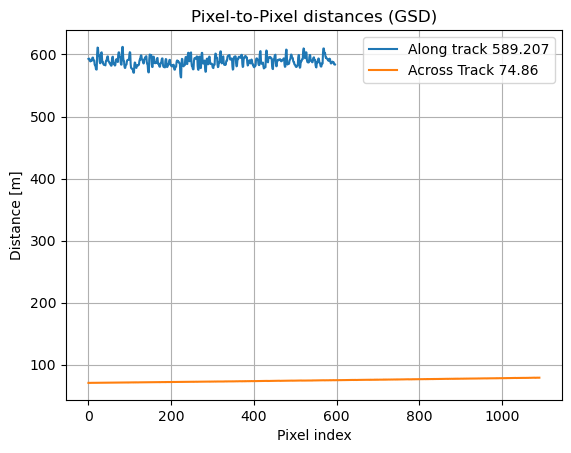

In [1]:
# Import Satellite Object
from hypso import Satellite

# Define HYPSO Image Directory
hypso_dir = r"/Users/alvaroflores/Documents/florida_2023-01-07_1524Z"
# hypso_dir = r"D:\4th Semester\Code\Datasets\Bundles\Bundle2\florida_2023-01-07_1524Z"
hypso_dir = r"/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z"

# Create Satellite Object
satobj = Satellite(hypso_dir)

# Create Plot and Images

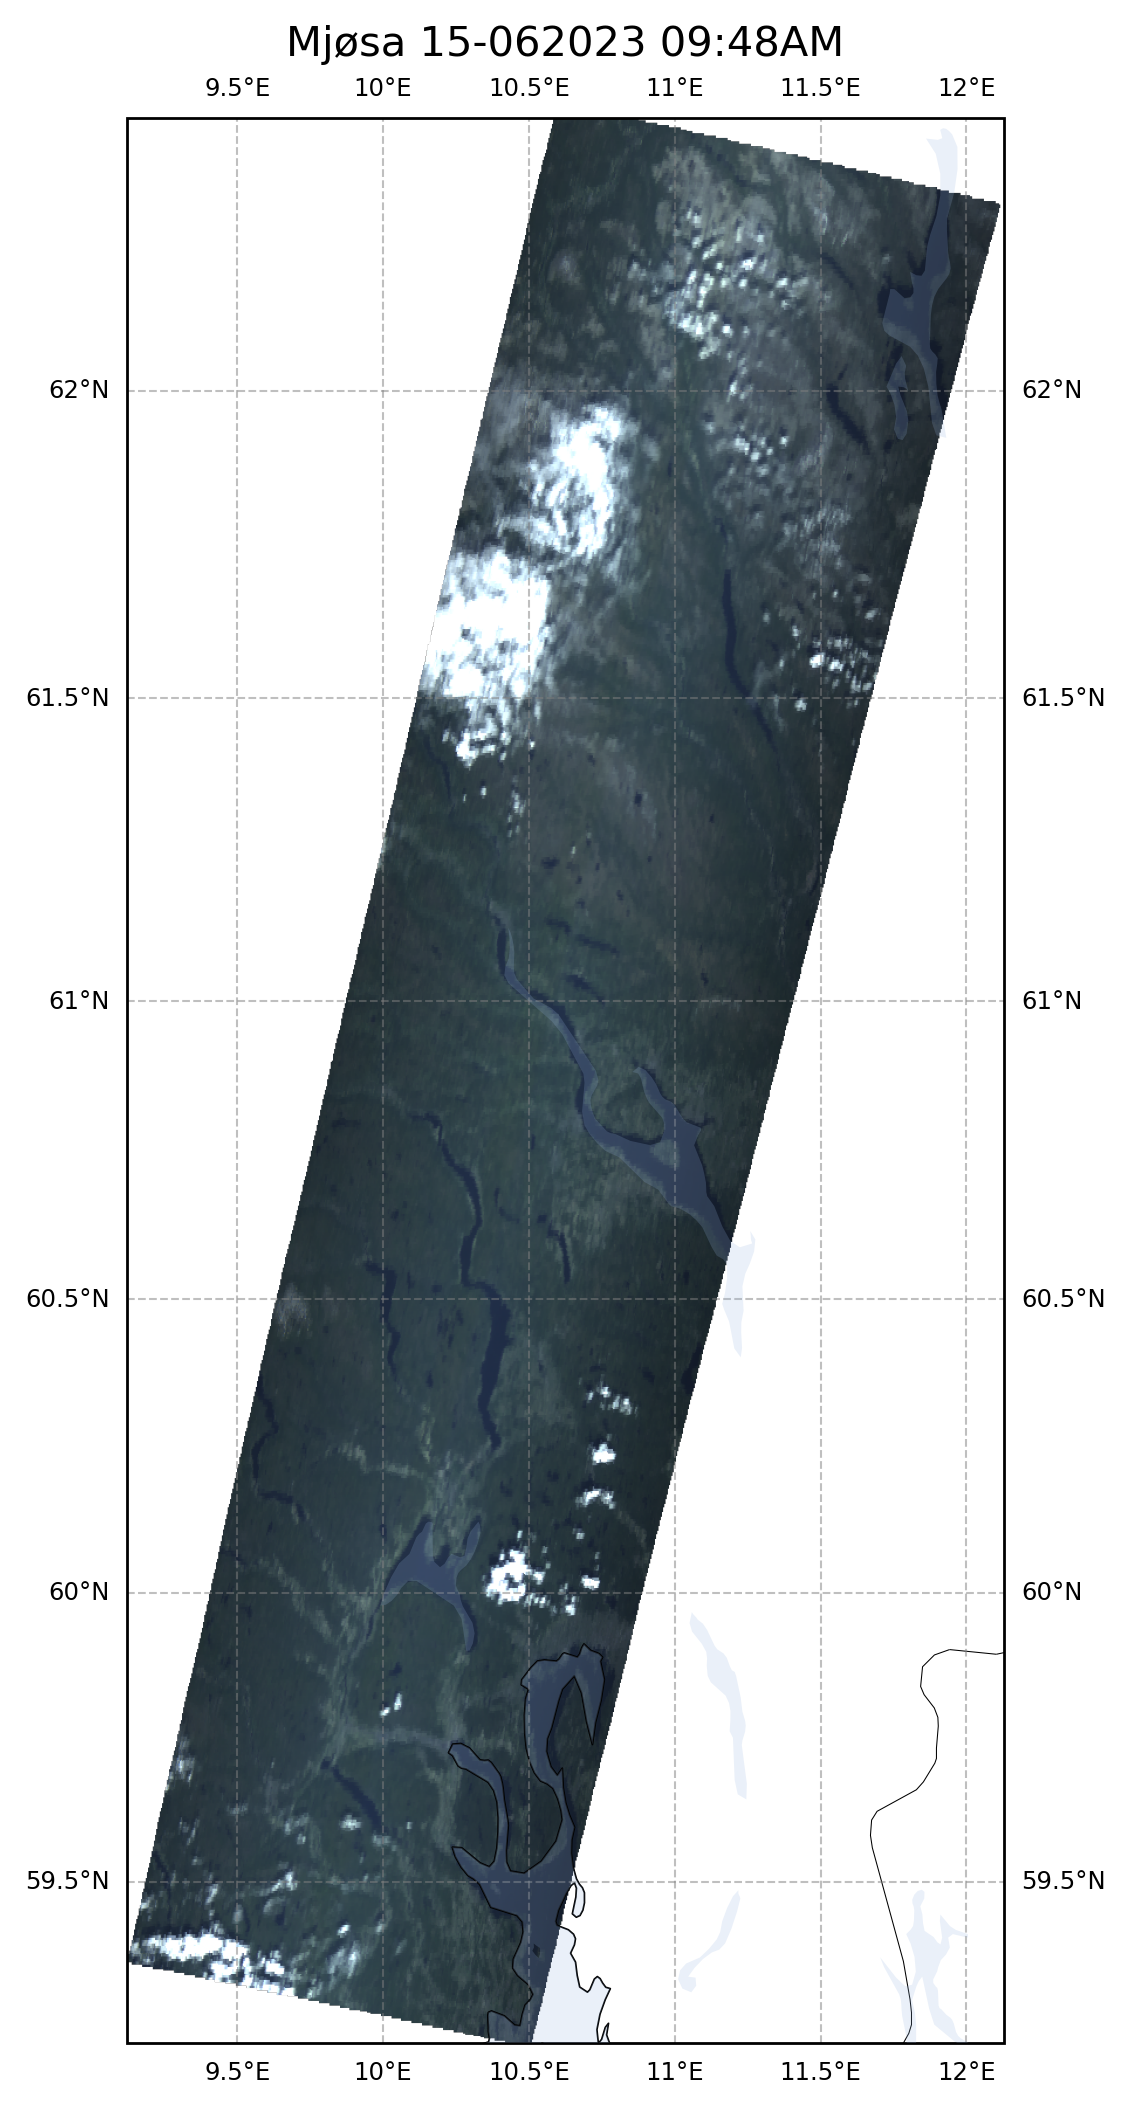

In [2]:
# Import Functions
from hypso.plot import show_rgb_map

# Show Map
show_rgb_map(satobj, plotTitle="Mjøsa 15-062023 09:48AM",dpi_input=250)

## Plot 2D Array on Map

2D Array Plot Range:  [0.01, 100]


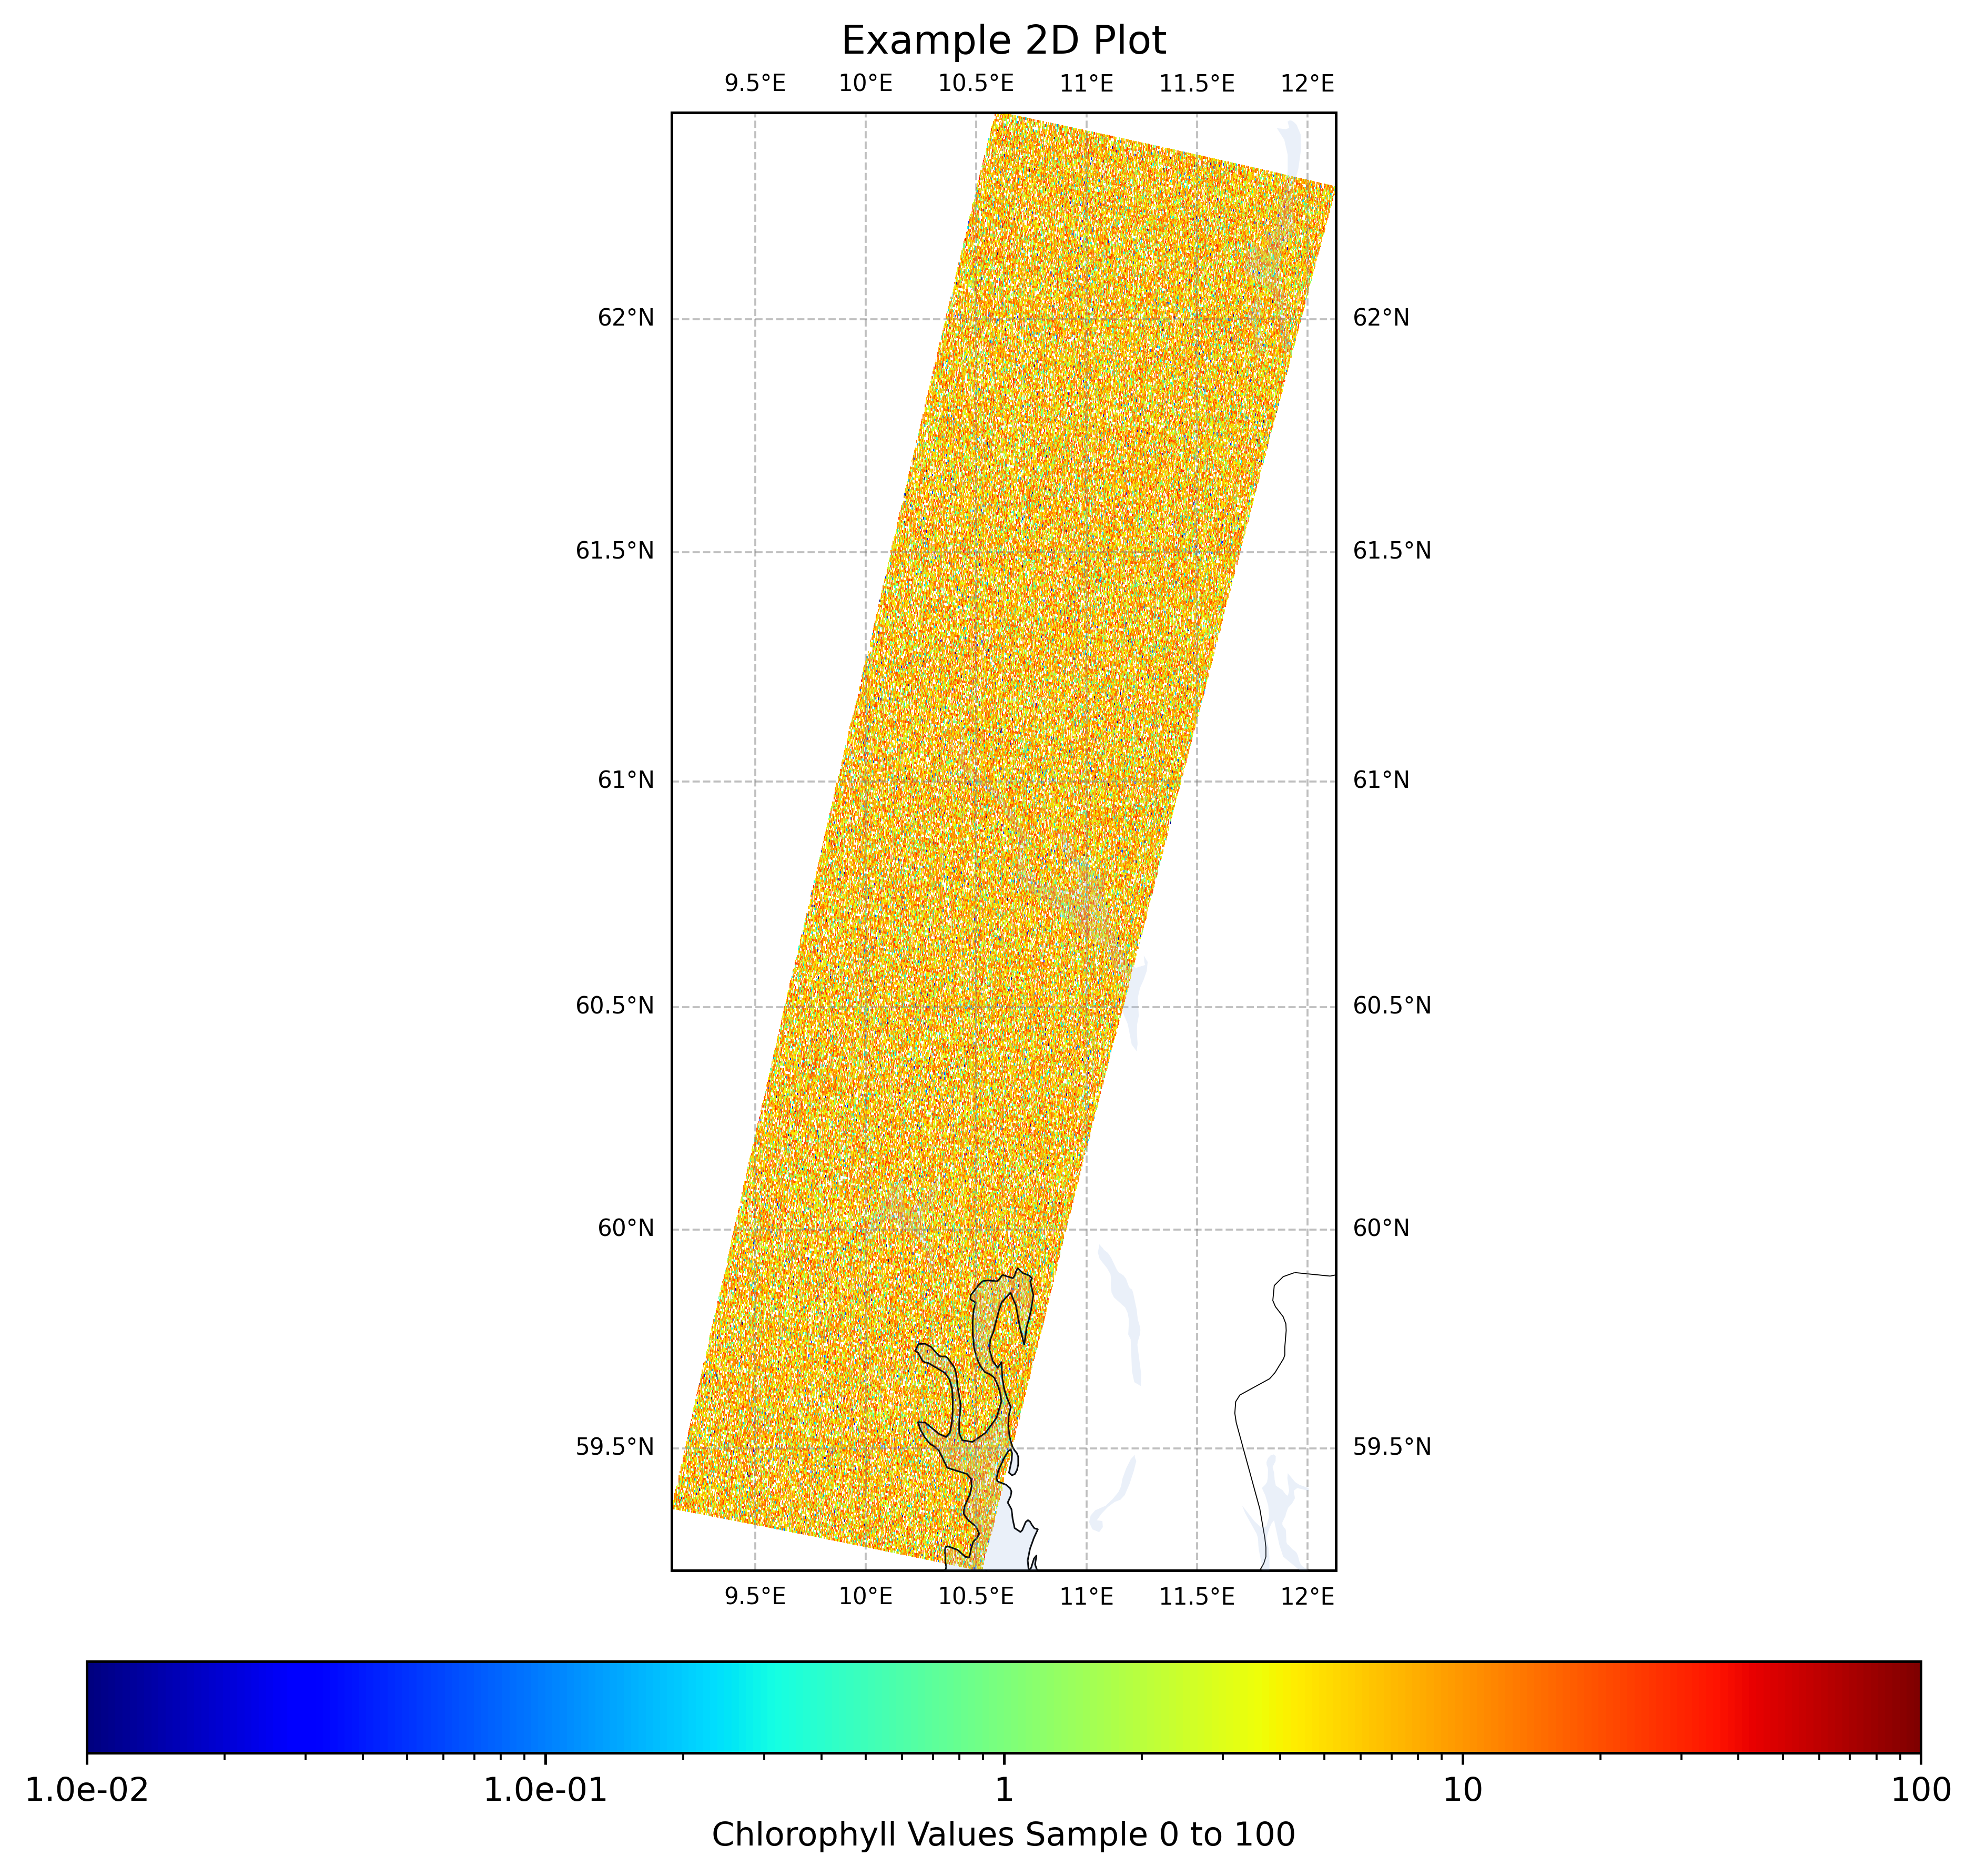

In [10]:
# Overlay Chlorophyll Array Estimations on Map

# Create Random Array of Chlorophyll Values
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)


from hypso.plot import plot_array_overlay
# Plot Array on Map
plot_array_overlay(satobj,chl_array, plotTitle="Example 2D Plot",cbar_title="Chlorophyll Values Sample 0 to 100", min_value=0.01,max_value=100)

## Export RGB to .png

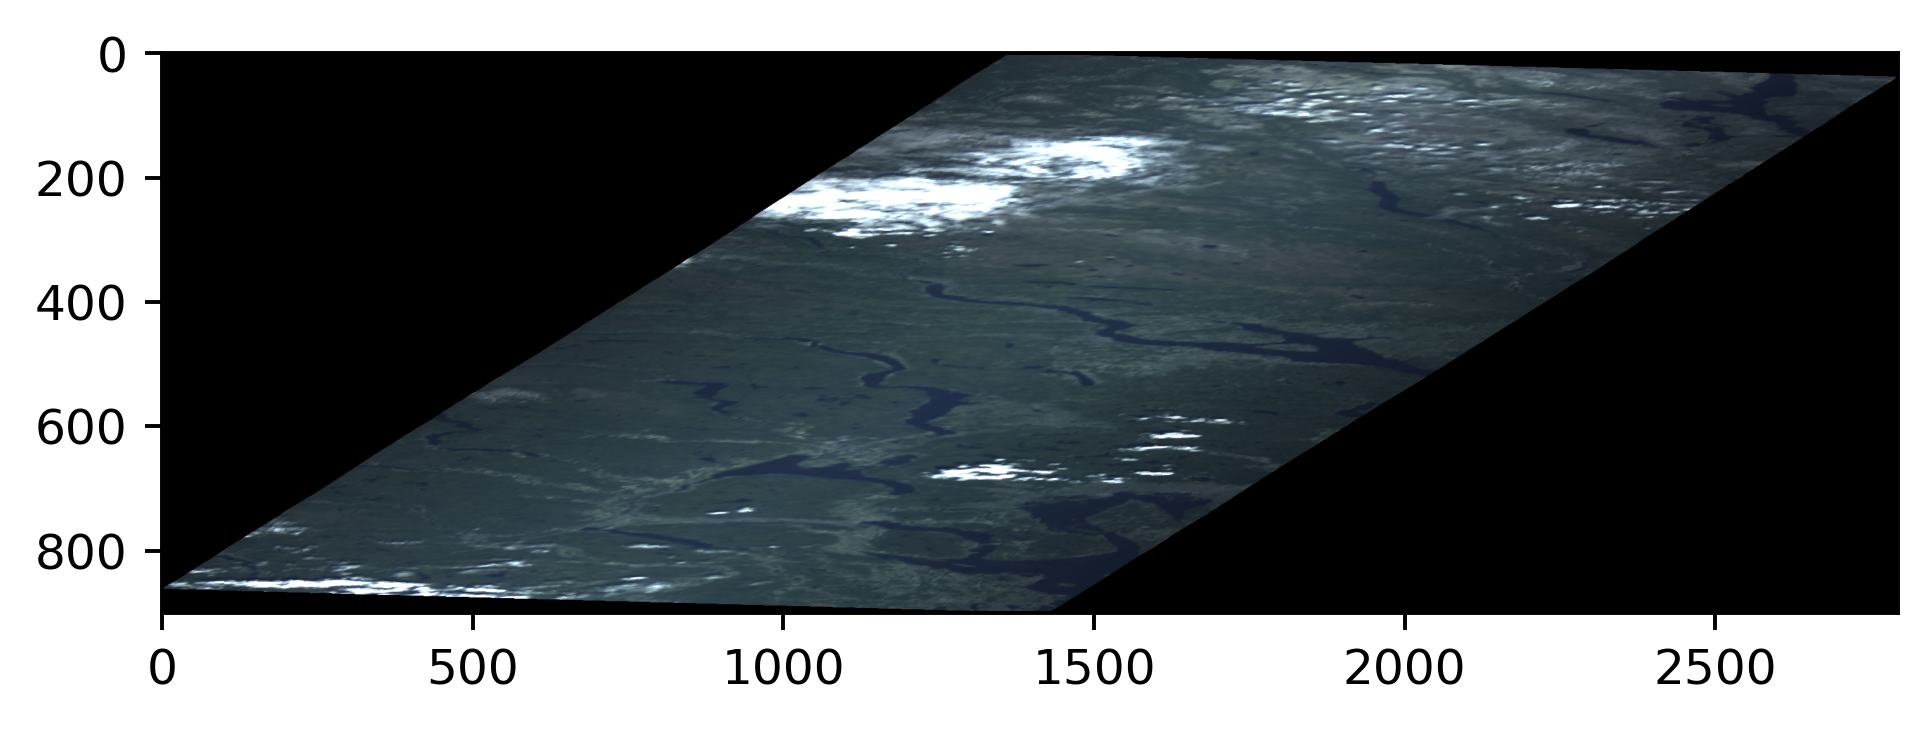

In [11]:
from hypso.plot import write_rgb_to_png

write_rgb_to_png(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

## Estimate Water Mask

L2 Atmospheric Correction Cube Not Found. L1B will be used


-------  Naive-Bayes Water Mask Detector  ----------
Loading configuration file /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini
File /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=17960.53997381854
k=3 :Calinski_harabaz index=12202.53206227523
k=4 :Calinski_harabaz index=8146.423437690052
k=5 :Calinski_harabaz index=17346.412441562
k=6 :Calinski_harabaz index=15609.76636108476
k=7 :Calinski_harabaz index=21229.039173304544
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 0
Skipping cluster_id 0


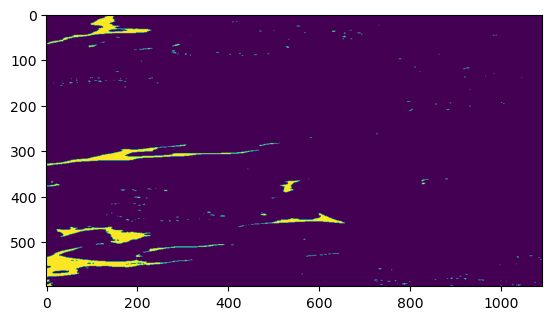

In [8]:
from hypso.classification import ndwi_watermask

# Calculate Water Mask
ndwi_watermask(satobj)

# Show Water Mask
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(satobj.waterMask)
plt.show()

## Get Spectra From Coordinate

In [12]:
spectra1 = satobj.get_spectra([60.7776,11.0895],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv") # Mjosa Sandvika
spectra1.head()

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (864, 438)


lat      lon    X    Y  wl387_85  wl391_4  wl394_96    wl398_51  \
0  60.7776  11.0895  864  438       0.0      0.0       0.0  327.395004   

     wl402_07    wl405_62  ...    wl771_76    wl775_18     wl778_6  \
0  590.386537  587.678425  ...  188.595806  193.023956  193.773106   

     wl782_02    wl785_44    wl788_86    wl792_28    wl795_69    wl799_11  \
0  196.441572  197.603349  195.626965  199.445941  212.211005  236.794984   

     wl802_52  
0  261.454326  

[1 rows x 124 columns]

## Export 2D Array (Single Channel) to GeoTiff

In [9]:
from hypso.georeference import array_to_geotiff

# Exporting water mask as GeoTiff
array_to_geotiff(satobj, satobj.waterMask, file_name="water_mask_export")

  Projecting pixel geodetic to map ...
    [59.218143, 62.437134, 9.122029, 12.129085]
    using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
  Grid points inside bounding polygon ...
    Points inside boundary: 1284705 / 2493067
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 0
      Done with band 0


## Export SatObject as .nc 

In [13]:
from hypso.exportfiles import write_h1data_as_NetCDF4


write_h1data_as_NetCDF4(satobj, path_to_save=r"/Users/alvaroflores/Desktop/demo.nc")

{'top_folder_name': '/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z', 'folder_name': 'mjosa_2023-06-15_0948Z', 'flags': '0x00000201', 'camera_ID': 2, 'frame_count': 598, 'exposure': 19.9921, 'fps': 12, 'row_count': 1092, 'column_count': 1080, 'sample_divisor': 1, 'bin_factor': 9, 'aoi_x': 428, 'aoi_y': 266, 'gain': 0, 'temp_log_period_ms': 10000, 'unixtime': 1686822499, 'iso_time': '2023-06-15T09:48:19', 'solar_zenith_angle': 40.75741, 'solar_azimuth_angle': 147.08437, 'sat_zenith_angle': 23.17196, 'sat_azimuth_angle': 102.26196, 'background_value': 72, 'x_start': 428, 'x_stop': 1508, 'y_start': 266, 'y_stop': 1358, 'exp': 0.019992100000000002, 'image_height': 1092, 'image_width': 120, 'im_size': 131040, 'capture_type': 'wide', 'latc': 60.91433, 'lonc': 10.28206, 'lat': array([[62.278732, 62.278877, 62.279022, ..., 62.43684 , 62.43699 ,
        62.437134],
       [62.273567, 62.273712, 62.273857, ..., 62.43165 , 62.431793,
        62.43194 ],
       [62.268394, 62.26854 , 62.2686

## Print Contents of .nc file

In [14]:
from hypso.exportfiles import print_nc

print_nc(r"/Users/alvaroflores/Desktop/demo.nc")

--- GROUP: "/" ---
DIMENSIONS: frames, lines, bands, 
VARIABLES: 
ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, radiometric_file, smile_file, destriping_file, spectral_file, 
SUB-GROUPS: navigation, products, scan_line_attributes, metadata, 

  --- GROUP: "/navigation" ---
  DIMENSIONS: 
  VARIABLES: unixtime, sensor_zenith, sensor_azimuth, solar_zenith, solar_azimuth, latitude, longitude, 
  ATTRIBUTES: iso8601time, 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  VARIABLES: Lt, 
  ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/scan_line_attributes" ---
  DIMENSIONS: 
  VARIABLES: scan_quality_flags, 
  ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/metadata" ---
  DIMENSIONS: 
  VARIABLES: 
  ATTRIBUTES: 
  SUB-GROUPS: FGDC, HYPSO, 

    --- GROUP: "/metadata/FGDC" ---
    DIMENSIONS: 
    VARIABLES: 
    ATTRIBUTES: 
    SUB-GROUPS: Indentificati

### NORMAL USE Case

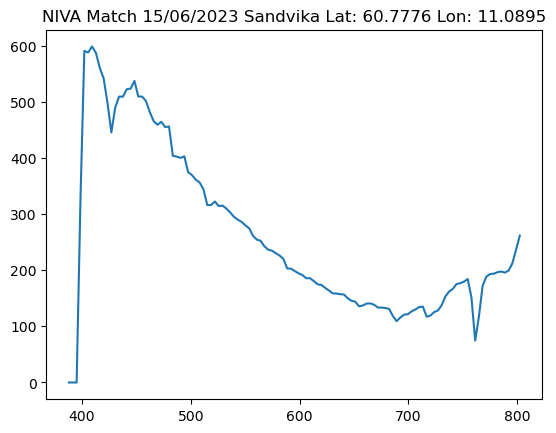

Min Lat:  59.218143
Max Lat:  62.437134
Min Lon:  9.122029
Max Lon:  12.129085


In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
val = np.array(spectra1)[0,4:]
plt.plot(satobj.wavelengths,val)
plt.title("NIVA Match 15/06/2023 Sandvika Lat: 60.7776 Lon: 11.0895")
plt.show()


print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))

In [16]:
spectra2 = satobj.get_spectra([60.6423, 11.1214],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra2.csv") # Mjosa Skreia
spectra2.head()

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.6423, 11.1214) -→ (825, 400)


lat      lon    X    Y  wl387_85  wl391_4  wl394_96    wl398_51  \
0  60.6423  11.1214  825  400       0.0      0.0       0.0  345.797972   

     wl402_07   wl405_62  ...    wl771_76    wl775_18    wl778_6    wl782_02  \
0  565.903846  591.66806  ...  106.342068  110.799746  110.15405  113.950598   

     wl785_44    wl788_86    wl792_28    wl795_69    wl799_11    wl802_52  
0  114.072752  112.748176  117.899906  129.540208  153.794799  175.635511  

[1 rows x 124 columns]

In [17]:
spectra3 = satobj.get_spectra([60.7783,11.0891],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra3.csv") # Mjosa Sandvika
spectra3.head()

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7783, 11.0891) -→ (865, 438)


lat      lon    X    Y  wl387_85  wl391_4  wl394_96    wl398_51  \
0  60.7783  11.0891  865  438       0.0      0.0       0.0  330.463651   

     wl402_07    wl405_62  ...   wl771_76    wl775_18     wl778_6    wl782_02  \
0  593.545755  593.749678  ...  163.02122  164.858357  172.378457  170.195164   

     wl785_44    wl788_86    wl792_28    wl795_69   wl799_11    wl802_52  
0  178.058812  181.208102  182.301632  191.624614  220.13824  239.374119  

[1 rows x 124 columns]

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (864, 438)


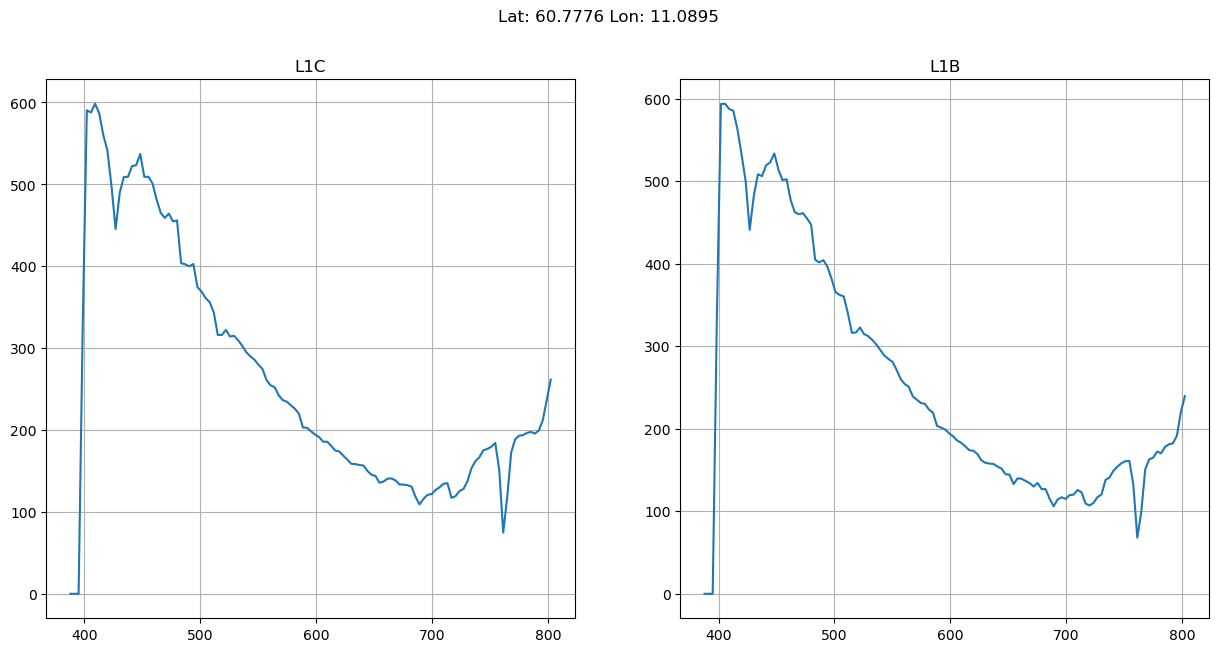

In [7]:
# Comparing Data Points
import numpy as np
import matplotlib.pyplot as plt
spectra_test1 = satobj.get_spectra([60.7776,11.0895],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv") # Mjosa Sandvika
spectra_test1.head()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 7))
fig.suptitle('Lat: 60.7776 Lon: 11.0895')
val = np.array(spectra_test1)[0,4:]
ax1.plot(satobj.wavelengths,val)
ax1.set_title("L1C")
ax1.grid(True)


# Closest L1B Coordinate
current_lat = satobj.info["lat"]
current_lon = satobj.info["lon"]

coordinates = [c for c in zip(current_lat.flatten(),current_lon.flatten())]
xy = (60.7776,11.0895)

dist = lambda x, y: (x[0]-y[0])**2 + (x[1]-y[1])**2
closest_existing_coord = min(coordinates, key=lambda co: dist(co, xy))
found_lat = list(np.argwhere(current_lat==closest_existing_coord[0])[0])
found_lon = list(np.argwhere(current_lon==closest_existing_coord[1])[0])

found = None
if (found_lon==found_lat):
    found = found_lat

ax2.plot(satobj.wavelengths,satobj.l1b_cube[found[0],found[1],:])
ax2.set_title("L1B")
ax2.grid(True)
plt.show()
